In [1]:
from EnergyDisaggregation.energydisaggregation.dataloader.config import DATACONFIG, CONFIG_WEATHER, CONFIG_POWER
#from EnergyDisaggregation.energydisaggregation.feature_engineering.utils import get_dataframe
import pandas as pd
import warnings
pd.options.plotting.backend = "plotly"
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df_process = get_dataframe()
df_process = pd.read_csv("df_process.csv", sep=",")
df_process.head()

,Date - Heure,Région,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,...,month_cos,week_day_sin,week_day_cos,température (°c)_lag_1,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7
0,2013-01-01 00:00:00+01:00,Auvergne-Rhône-Alpes,8173.0,9.375,50.00,10.275,36.99,5.309697,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 00:00:00+01:00,Bourgogne-Franche-Comté,2357.0,2.675,98.75,1.825,6.57,0.849588,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 00:00:00+01:00,Bretagne,3050.0,9.475,81.25,3.975,14.31,7.354916,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 00:00:00+01:00,Centre-Val de Loire,2476.0,8.200,90.00,5.950,21.42,4.960144,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 00:00:00+01:00,Grand Est,4943.0,5.075,100.00,5.550,19.98,1.164014,3,True,...,0.866025,0.781831,0.62349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736128 entries, 0 to 736127
Data columns (total 32 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Date - Heure                               736128 non-null  object 
 1   Région                                     736128 non-null  object 
 2   consommation brute électricité (mw) - rte  736128 non-null  float64
 3   température (°c)                           736128 non-null  float64
 4   nebulosité totale                          736128 non-null  float64
 5   vitesse du vent moyen 10 mn                736128 non-null  float64
 6   vitesse du vent en km/h                    736128 non-null  float64
 7   température ressentie                      736128 non-null  float64
 8   saison                                     736128 non-null  int64  
 9   is_holiday                                 736128 non-null  bool   
 10  is_bank_

In [5]:
def day_of_year(date_str):
    return date_str.timetuple().tm_yday

In [6]:
df_process["Time"] = pd.to_datetime(df_process["Date - Heure"])
df_process.set_index(["Time","Région"], inplace=True)
df_process['day_of_year'] = df_process.index.get_level_values(0).map(day_of_year)
df_process['day'] = df_process.index.get_level_values(0).map(lambda x: x.day)
df_process['month'] = df_process.index.get_level_values(0).map(lambda x: x.month)
df_process['hour'] = df_process.index.get_level_values(0).map(lambda x: x.hour)

In [7]:
df_process

Date - Heure  \
Time                      Région                                                  
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes        2013-01-01 00:00:00+01:00   
                          Bourgogne-Franche-Comté     2013-01-01 00:00:00+01:00   
                          Bretagne                    2013-01-01 00:00:00+01:00   
                          Centre-Val de Loire         2013-01-01 00:00:00+01:00   
                          Grand Est                   2013-01-01 00:00:00+01:00   
...                                                                         ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine          2019-12-31 23:00:00+01:00   
                          Occitanie                   2019-12-31 23:00:00+01:00   
                          Pays de la Loire            2019-12-31 23:00:00+01:00   
                          Provence-Alpes-Côte d'Azur  2019-12-31 23:00:00+01:00   
                          Île-de-France               2019-12-31 23:00:00+01:00   

                                                      consommation brute électricité (mw) - rte  \
Time                      Région                                                                  
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes                                           8173.0   
                          Bourgogne-Franche-Comté                                        2357.0   
                          Bretagne                                                       3050.0   
                          Centre-Val de Loire                                            2476.0   
                          Grand Est                                                      4943.0   
...                                                                                         ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine                                            12110.0   
                          Occitanie                                                     10984.0   
                          Pays de la Loire                                               8133.0   
                          Provence-Alpes-Côte d'Azur                                    12127.0   
                          Île-de-France                                                 21295.0   

                                                      température (°c)  \
Time                      Région                                         
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes                9.375000   
                          Bourgogne-Franche-Comté             2.675000   
                          Bretagne                            9.475000   
                          Centre-Val de Loire                 8.200000   
                          Grand Est                           5.075000   
...                                                                ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine                  8.133333   
                          Occitanie                           5.000000   
                          Pays de la Loire                    7.525000   
                          Provence-Alpes-Côte d'Azur          4.450000   
                          Île-de-France                      -1.075000   

                                                      nebulosité totale  \
Time                      Région                                          
2013-01-01 00:00:00+01:00 Auvergne-Rhône-Alpes                50.000000   
                          Bourgogne-Franche-Comté             98.750000   
                          Bretagne                            81.250000   
                          Centre-Val de Loire                 90.000000   
                          Grand Est                          100.000000   
...                                                                 ...   
2019-12-31 23:00:00+01:00 Nouvelle-Aquitaine                 100.000000   
                          Occitanie                          

### Choix de la région

In [8]:
# version multiindex
df_region = df_process.xs("Île-de-France",level=DATACONFIG["Region"])
#df_region = df_process[df_process["Région"]=="Bretagne"]
# data par heure pour une région
df_region.head()

,Date - Heure,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,is_bank_holiday,...,température (°c)_lag_2,température (°c)_lag_3,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7,day_of_year,day,month,hour
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+01:00,2013-01-01 00:00:00+01:00,9134.0,7.900000,92.500000,6.575000,23.67,4.362791,3,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,0
2013-01-01 01:00:00+01:00,2013-01-01 01:00:00+01:00,17321.0,7.608333,90.833333,6.066667,21.84,4.166935,3,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1
2013-01-01 02:00:00+01:00,2013-01-01 02:00:00+01:00,16379.0,7.641667,94.166667,5.533333,19.92,4.408942,3,True,True,...,-0.258333,NaN,NaN,NaN,NaN,NaN,1,1,1,2
2013-01-01 03:00:00+01:00,2013-01-01 03:00:00+01:00,15515.0,7.675000,97.500000,5.000000,18.00,4.667165,3,True,True,...,0.066667,-0.225000,NaN,NaN,NaN,NaN,1,1,1,3
2013-01-01 04:00:00+01:00,2013-01-01 04:00:00+01:00,14818.0,7.741667,100.000000,4.516667,16.26,4.963242,3,True,True,...,0.100000,0.133333,-0.158333,NaN,NaN,NaN,1,1,1,4


In [9]:
def cyclical_encoder(df_tot, col, max_val):
    df = df_tot.copy()
    # On encode les paramètres cycliques (heure, mois, etc) à l'aide de deux colonnes sin et cos
    df[col + "_sin"] = np.sin(2 * np.pi * df[col] / max_val)
    df[col + "_cos"] = np.cos(2 * np.pi * df[col] / max_val)
    return df.loc[:, [col + "_sin", col + "_cos"]]

In [10]:
df_region_new = pd.concat([df_region, cyclical_encoder(df_region, "hour", 24)], axis=1)

### Test modèle
sélectionner les variables

In [11]:
df_region_new.columns

Index(['Date - Heure', 'consommation brute électricité (mw) - rte',
       'température (°c)', 'nebulosité totale', 'vitesse du vent moyen 10 mn',
       'vitesse du vent en km/h', 'température ressentie', 'saison',
       'is_holiday', 'is_bank_holiday', 'temperature_seuil', 'saturation',
       'diff_seuil', 'température ressentie.1', 'température (°c)_mean_48',
       'température (°c)_std_48', 'température (°c)_max_48',
       'température (°c)_min_48', 'nebulosité totale_mean_3',
       'nebulosité totale_std_3', 'month_sin', 'month_cos', 'week_day_sin',
       'week_day_cos', 'température (°c)_lag_1', 'température (°c)_lag_2',
       'température (°c)_lag_3', 'température (°c)_lag_4',
       'température (°c)_lag_5', 'température (°c)_lag_6',
       'température (°c)_lag_7', 'day_of_year', 'day', 'month', 'hour',
       'hour_sin', 'hour_cos'],
      dtype='object')

In [12]:
df_region_new

,Date - Heure,consommation brute électricité (mw) - rte,température (°c),nebulosité totale,vitesse du vent moyen 10 mn,vitesse du vent en km/h,température ressentie,saison,is_holiday,is_bank_holiday,...,température (°c)_lag_4,température (°c)_lag_5,température (°c)_lag_6,température (°c)_lag_7,day_of_year,day,month,hour,hour_sin,hour_cos
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+01:00,2013-01-01 00:00:00+01:00,9134.0,7.900000e+00,92.500000,6.575000,23.67,4.362791,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,0,0.000000,1.000000
2013-01-01 01:00:00+01:00,2013-01-01 01:00:00+01:00,17321.0,7.608333e+00,90.833333,6.066667,21.84,4.166935,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,1,0.258819,0.965926
2013-01-01 02:00:00+01:00,2013-01-01 02:00:00+01:00,16379.0,7.641667e+00,94.166667,5.533333,19.92,4.408942,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,2,0.500000,0.866025
2013-01-01 03:00:00+01:00,2013-01-01 03:00:00+01:00,15515.0,7.675000e+00,97.500000,5.000000,18.00,4.667165,3,True,True,...,NaN,NaN,NaN,NaN,1,1,1,3,0.707107,0.707107
2013-01-01 04:00:00+01:00,2013-01-01 04:00:00+01:00,14818.0,7.741667e+00,100.000000,4.516667,16.26,4.963242,3,True,True,...,-0.158333,NaN,NaN,NaN,1,1,1,4,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+01:00,2019-12-31 19:00:00+01:00,22992.0,1.866667e+00,36.666667,1.483333,5.34,0.382706,3,True,False,...,-2.633333,-2.233333,-1.833333,-0.558333,365,31,12,19,-0.965926,0.258819
2019-12-31 20:00:00+01:00,2019-12-31 20:00:00+01:00,22144.0,9.333333e-01,23.333333,1.416667,5.10,-0.575760,3,True,False,...,-3.641667,-3.566667,-3.166667,-2.766667,365,31,12,20,-0.866025,0.500000
2019-12-31 21:00:00+01:00,2019-12-31 21:00:00+01:00,20824.0,1.421085e-14,10.000000,1.350000,4.86,-1.522737,3,True,False,...,-3.675000,-4.575000,-4.500000,-4.100000,365,31,12,21,-0.707107,0.707107


In [13]:
df_model = df_region_new[["consommation brute électricité (mw) - rte", "température (°c)_mean_48", 
                     "nebulosité totale_mean_3", "month_sin", "month_cos", "week_day_sin", "week_day_cos",
                     "hour_sin", "hour_cos",
                     "is_holiday", "is_bank_holiday"]]
df_model.head()

,consommation brute électricité (mw) - rte,température (°c)_mean_48,nebulosité totale_mean_3,month_sin,month_cos,week_day_sin,week_day_cos,hour_sin,hour_cos,is_holiday,is_bank_holiday
Time,,,,,,,,,,,
2013-01-01 00:00:00+01:00,9134.0,6.569792,53.333333,0.5,0.866025,0.781831,0.62349,0.000000,1.000000,True,True
2013-01-01 01:00:00+01:00,17321.0,6.626389,69.861111,0.5,0.866025,0.781831,0.62349,0.258819,0.965926,True,True
2013-01-01 02:00:00+01:00,16379.0,6.667708,92.500000,0.5,0.866025,0.781831,0.62349,0.500000,0.866025,True,True
2013-01-01 03:00:00+01:00,15515.0,6.693750,94.166667,0.5,0.866025,0.781831,0.62349,0.707107,0.707107,True,True
2013-01-01 04:00:00+01:00,14818.0,6.710764,97.222222,0.5,0.866025,0.781831,0.62349,0.866025,0.500000,True,True


In [14]:
df_model.describe()

,consommation brute électricité (mw) - rte,température (°c)_mean_48,nebulosité totale_mean_3,month_sin,month_cos,week_day_sin,week_day_cos,hour_sin,hour_cos
count,61344.000000,61344.000000,61344.000000,6.134400e+04,6.134400e+04,61344.000000,61344.000000,6.134400e+04,6.134400e+04
mean,16380.656478,12.300224,65.874477,-5.040174e-03,-2.176126e-03,0.000306,0.000244,-1.841685e-17,-5.552563e-17
std,4311.771613,6.564319,33.454683,7.057100e-01,7.084911e-01,0.707143,0.707082,7.071125e-01,7.071125e-01
min,7763.000000,-4.619792,0.000000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00
25%,13214.750000,7.080078,40.416667,-8.660254e-01,-8.660254e-01,-0.781831,-0.900969,-7.071068e-01,-7.071068e-01
50%,15813.000000,11.861458,79.583333,-2.449294e-16,-1.836970e-16,0.000000,-0.222521,6.123234e-17,-6.123234e-17
75%,19295.000000,17.338021,91.666667,5.000000e-01,8.660254e-01,0.781831,0.623490,7.071068e-01,7.071068e-01
max,30488.000000,32.542188,101.000000,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00


In [15]:
df_model1 = df_region_new[["consommation brute électricité (mw) - rte", "température (°c)_mean_48", 
                     "nebulosité totale_mean_3", "month", "week_day_cos", "week_day_sin", "hour", "is_holiday", "is_bank_holiday"]]
df_model1.head()

,consommation brute électricité (mw) - rte,température (°c)_mean_48,nebulosité totale_mean_3,month,week_day_cos,week_day_sin,hour,is_holiday,is_bank_holiday
Time,,,,,,,,,
2013-01-01 00:00:00+01:00,9134.0,6.569792,53.333333,1,0.62349,0.781831,0,True,True
2013-01-01 01:00:00+01:00,17321.0,6.626389,69.861111,1,0.62349,0.781831,1,True,True
2013-01-01 02:00:00+01:00,16379.0,6.667708,92.500000,1,0.62349,0.781831,2,True,True
2013-01-01 03:00:00+01:00,15515.0,6.693750,94.166667,1,0.62349,0.781831,3,True,True
2013-01-01 04:00:00+01:00,14818.0,6.710764,97.222222,1,0.62349,0.781831,4,True,True


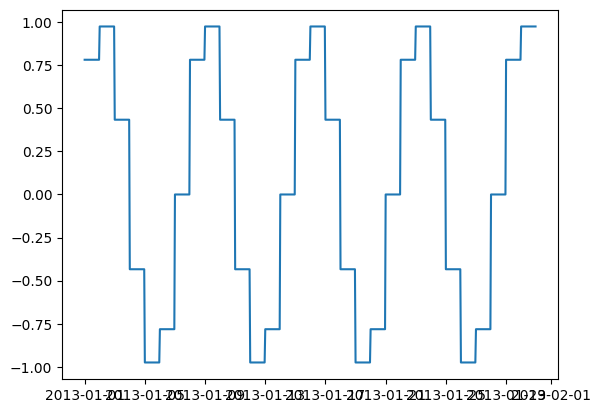

In [16]:
plt.plot(df_model['week_day_sin'][:24*30])

In [17]:
# no missing values
df_model.isna().sum(axis=0)

consommation brute électricité (mw) - rte    0
température (°c)_mean_48                     0
nebulosité totale_mean_3                     0
month_sin                                    0
month_cos                                    0
week_day_sin                                 0
week_day_cos                                 0
hour_sin                                     0
hour_cos                                     0
is_holiday                                   0
is_bank_holiday                              0
dtype: int64

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
df_model = df_model1.copy()

Split randomly

In [20]:
X = df_model.drop(["consommation brute électricité (mw) - rte"], axis=1)
y = df_model[["consommation brute électricité (mw) - rte"]]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Split years

In [22]:
for annee in [2013, 2014, 2015, 2016, 2017, 2018, 2019]:
    print(len(df_model[pd.to_datetime(df_model.index).year==annee]))

8760
8760
8760
8784
8760
8760
8760


In [23]:
test = df_model[(pd.to_datetime(df_model.index).year==2018) | (pd.to_datetime(df_model.index).year==2019)]
train = df_model[(pd.to_datetime(df_model.index).year!=2018) & (pd.to_datetime(df_model.index).year!=2019)]
print(len(test), len(train))
X_train_year = train.drop(["consommation brute électricité (mw) - rte"], axis=1)
y_train_year = train["consommation brute électricité (mw) - rte"]
X_test_year = test.drop(["consommation brute électricité (mw) - rte"], axis=1)
y_test_year = test["consommation brute électricité (mw) - rte"]

17520 43824


In [24]:
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_percentage_error

In [25]:
def analyse_model(X_train, y_train, X_test, y_test, model, name_model, print_metrics=True, analyse=True, plot_pred=True):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    if print_metrics == True:
        print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
        print('R2: ', reg.score(X_test, y_test))
        print('var exp: ', explained_variance_score(y_test, y_pred))
        print('mean percentage error : ', mean_absolute_percentage_error(y_test, y_pred))
    if analyse == True:
        
        if name_model == 'rf_reg':
            importances = reg.feature_importances_
            forest_importances = pd.DataFrame({'feat_imp':importances}, index=list(X_train.columns))
            print(forest_importances.sort_values(by='feat_imp', ascending=False))
        if name_model == 'lin_reg':
            coefs = reg.coef_
            coefs_values = pd.DataFrame({'coefs':coefs}, index=list(X_train.columns))
            print(coefs_values.sort_values(by='coefs', ascending=False))
    if plot_pred == True:
        plt.scatter(y_pred, y_test, s=4)
        x = np.linspace(y_pred.min(), y_pred.max(), 3)
        plt.plot(x,x, color='red', label="y=x, pred parfaite")
        plt.xlabel("y_pred")
        plt.ylabel("y_true")
        plt.title("Conso réelle en fonction de conso prédite")
        plt.legend()
    return y_pred

RMSE:  936.670017273003
R2:  0.9509039663006156
var exp:  0.9587837610139267
mean percentage error :  0.04453703563731744
                          feat_imp
température (°c)_mean_48  0.665268
hour                      0.218004
week_day_sin              0.053424
month                     0.030701
is_holiday                0.011688
nebulosité totale_mean_3  0.009908
is_bank_holiday           0.007942
week_day_cos              0.003066


array([13628.78, 12549.89, 12179.92, ..., 23451.06, 22972.53, 23105.59])

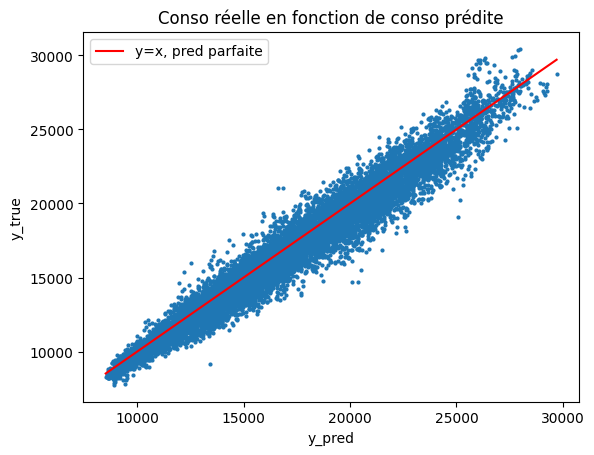

In [26]:
analyse_model(X_train_year, y_train_year, X_test_year, y_test_year, model=RandomForestRegressor(), name_model='rf_reg')

In [27]:
X_train_year.columns

Index(['température (°c)_mean_48', 'nebulosité totale_mean_3', 'month',
       'week_day_cos', 'week_day_sin', 'hour', 'is_holiday',
       'is_bank_holiday'],
      dtype='object')

RMSE:  2305.3514137493617
R2:  0.7025955634224246
var exp:  0.7027429446534524
mean percentage error :  0.12592793527540633
                                coefs
week_day_sin              1052.085275
hour                       190.672787
nebulosité totale_mean_3     5.856876
month                      -61.024507
week_day_cos              -348.648367
is_holiday                -368.821342
température (°c)_mean_48  -496.461311
is_bank_holiday          -2184.937436


array([11934.88265055, 12114.66276947, 12267.42092462, ...,
       23388.36548701, 23549.14004605, 23799.25897706])

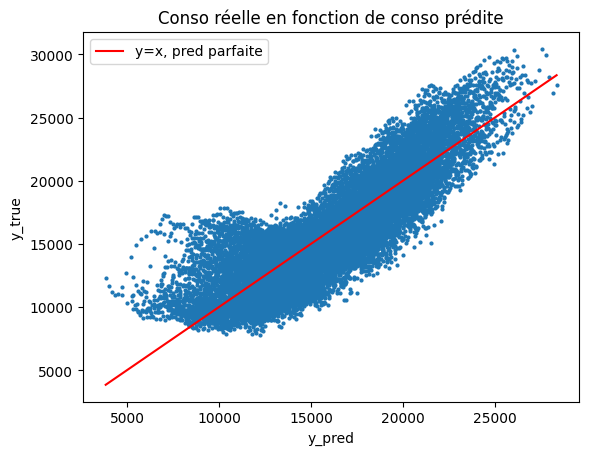

In [28]:
analyse_model(X_train_year, y_train_year, 
              X_test_year, y_test_year, model=LinearRegression(), name_model="lin_reg")

### Fit model for prediction

In [29]:
model = RandomForestRegressor()
model.fit(X_train_year, y_train_year)

RandomForestRegressor()

In [30]:
print(df_model["température (°c)_mean_48"].describe())

count    61344.000000
mean        12.300224
std          6.564319
min         -4.619792
25%          7.080078
50%         11.861458
75%         17.338021
max         32.542188
Name: température (°c)_mean_48, dtype: float64


In [31]:
from EnergyDisaggregation.energydisaggregation.feature_engineering.calendar import get_zone, get_holiday_for_zone
from vacances_scolaires_france import SchoolHolidayDates
from jours_feries_france import JoursFeries

holidays = SchoolHolidayDates()
feries = JoursFeries()

zone_reg = get_zone('Bretagne')

In [32]:
dates = pd.date_range(start=str(2018)+'/01/01', end=str(2018+1)+'/01/01', freq='h', tz='Europe/Warsaw')
dates

DatetimeIndex(['2018-01-01 00:00:00+01:00', '2018-01-01 01:00:00+01:00',
               '2018-01-01 02:00:00+01:00', '2018-01-01 03:00:00+01:00',
               '2018-01-01 04:00:00+01:00', '2018-01-01 05:00:00+01:00',
               '2018-01-01 06:00:00+01:00', '2018-01-01 07:00:00+01:00',
               '2018-01-01 08:00:00+01:00', '2018-01-01 09:00:00+01:00',
               ...
               '2018-12-31 15:00:00+01:00', '2018-12-31 16:00:00+01:00',
               '2018-12-31 17:00:00+01:00', '2018-12-31 18:00:00+01:00',
               '2018-12-31 19:00:00+01:00', '2018-12-31 20:00:00+01:00',
               '2018-12-31 21:00:00+01:00', '2018-12-31 22:00:00+01:00',
               '2018-12-31 23:00:00+01:00', '2019-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Warsaw]', length=8761, freq='H')

In [33]:
len(list(pd.Series(dates.date).apply(feries.is_bank_holiday)))

8761

In [34]:
def generate_annee(annee, data_train, region):
    dates = pd.date_range(start=str(annee)+'/01/01', end=str(annee+1)+'/01/01', freq='h', tz='Europe/Warsaw')
    month_list = list(dates.month)
    day_list = list(dates.weekday)
    hour_list = list(dates.hour)
    df_tot = pd.DataFrame({"month":month_list, "week_day":day_list, "hour": hour_list}, index=dates)
    df_pred = pd.concat([cyclical_encoder(df_tot, "month", 12), 
                         cyclical_encoder(df_tot, "week_day", 7),
                         cyclical_encoder(df_tot, "hour", 24)], axis=1).iloc[:-1,:]
    nebu_mean = list(data_train.groupby([pd.to_datetime(data_train.index).day_of_year, 
                                        pd.to_datetime(data_train.index).hour]).mean()['nebulosité totale_mean_3'])
    if len(df_pred) < len(nebu_mean):
        del(nebu_mean[59*24:60*24])
    if len(df_pred) > len(nebu_mean):
        left = nebu_mean[:59*24]
        right = nebu_mean[59*24:]
        nebu_mean = left.append(right)
    assert len(df_pred) == len(nebu_mean)
    df_pred["nebulosité totale_mean_3"] = nebu_mean
    df_pred["is_bank_holiday"] = list(pd.Series(dates.date).apply(feries.is_bank_holiday))[:-1]
    zone_reg = get_zone(region)
    df_pred["is_holiday"] = list(pd.DataFrame({"date":dates.date, "zone":np.repeat(zone_reg, len(dates))}
                                              ).apply(get_holiday_for_zone, axis=1))[:-1]
    return df_pred

In [43]:
def generate_annee_2(annee, data_train, region):
    dates = pd.date_range(start=str(annee)+'/01/01', end=str(annee+1)+'/01/01', freq='h', tz='Europe/Warsaw')
    month_list = list(dates.month)
    day_list = list(dates.weekday)
    hour_list = list(dates.hour)
    df_tot = pd.DataFrame({"month":month_list, "week_day":day_list, "hour": hour_list}, index=dates)
    df_pred = pd.concat([df_tot, cyclical_encoder(df_tot, "week_day", 7)], axis=1)
    print(df_pred)
    nebu_mean = list(data_train.groupby([pd.to_datetime(data_train.index).day_of_year, 
                                        pd.to_datetime(data_train.index).hour]).mean()['nebulosité totale_mean_3'])
    if len(df_pred) < len(nebu_mean):
        del(nebu_mean[59*24:60*24])
    if len(df_pred) > len(nebu_mean):
        left = nebu_mean[:59*24]
        right = nebu_mean[59*24:]
        nebu_mean = left.append(right)
    assert len(df_pred) == len(nebu_mean)
    df_pred["nebulosité totale_mean_3"] = nebu_mean
    df_pred["is_bank_holiday"] = list(pd.Series(dates.date).apply(feries.is_bank_holiday))[:-1]
    zone_reg = get_zone(region)
    df_pred["is_holiday"] = list(pd.DataFrame({"date":dates.date, "zone":np.repeat(zone_reg, len(dates))}
                                              ).apply(get_holiday_for_zone, axis=1))[:-1]
    return df_pred

In [44]:
data_pred = generate_annee_2(2018, X_train_year, 'Île-de-France')
print(len(data_pred))
data_pred

                           month  week_day  hour  week_day_sin  week_day_cos
2018-01-01 00:00:00+01:00      1         0     0      0.000000       1.00000
2018-01-01 01:00:00+01:00      1         0     1      0.000000       1.00000
2018-01-01 02:00:00+01:00      1         0     2      0.000000       1.00000
2018-01-01 03:00:00+01:00      1         0     3      0.000000       1.00000
2018-01-01 04:00:00+01:00      1         0     4      0.000000       1.00000
...                          ...       ...   ...           ...           ...
2018-12-31 20:00:00+01:00     12         0    20      0.000000       1.00000
2018-12-31 21:00:00+01:00     12         0    21      0.000000       1.00000
2018-12-31 22:00:00+01:00     12         0    22      0.000000       1.00000
2018-12-31 23:00:00+01:00     12         0    23      0.000000       1.00000
2019-01-01 00:00:00+01:00      1         1     0      0.781831       0.62349

[8761 rows x 5 columns]


TypeError: object of type 'NoneType' has no len()

In [36]:
X_train_year.columns.to_list()

['température (°c)_mean_48',
 'nebulosité totale_mean_3',
 'month',
 'week_day_cos',
 'week_day_sin',
 'hour',
 'is_holiday',
 'is_bank_holiday']

In [37]:
conso_reg = []
temp = np.linspace(-6, 33, 100)
for i in range(len(data_pred)): 
    val_fix = data_pred.iloc[[i],:]
    new_df = pd.DataFrame({"température (°c)_mean_48":temp})
    for x in val_fix.columns:
        new_df[x] = np.repeat(val_fix[x][0], len(temp))
    if i==1:
        print(new_df)
    new_df = new_df[list(X_train_year.columns)]
    pred = model.predict(new_df)
    conso_reg.append(pred.min())
    if i%1000:
        print(i, pred.min() )


KeyError: "['month', 'hour'] not in index"

In [ ]:
test_2018 =  df_model[(pd.to_datetime(df_model.index).year==2018)]
test_2018 = test_2018.drop(["consommation brute électricité (mw) - rte"], axis=1)
conso_pred = model.predict(test_2018)

In [ ]:
conso_therm = conso_pred - conso_reg

In [ ]:
res = pd.DataFrame({"conso_pred":conso_pred, "conso_reg":conso_reg, "conso_therm":conso_therm}, index=test_2018.index)
print(len(res))

8760


In [ ]:
res.describe()

,conso_pred,conso_reg,conso_therm
count,8760.000000,8760.000000,8760.000000
mean,16250.656586,10296.570775,5954.085811
std,4066.440950,2859.887494,3032.476741
min,5734.971049,3325.812255,-772.581728
25%,13053.167509,8168.281630,3093.340705
50%,16248.846876,10313.603443,6127.792055
75%,19455.431542,12365.071105,8522.665774
max,26670.564516,16959.931253,11926.551893


In [ ]:
res[res["conso_therm"]<=0]

,conso_pred,conso_reg,conso_therm
Time,,,
2018-05-08 23:00:00+01:00,10641.632170,11414.213898,-772.581728
2018-05-21 23:00:00+01:00,10761.610368,10930.193473,-168.583106


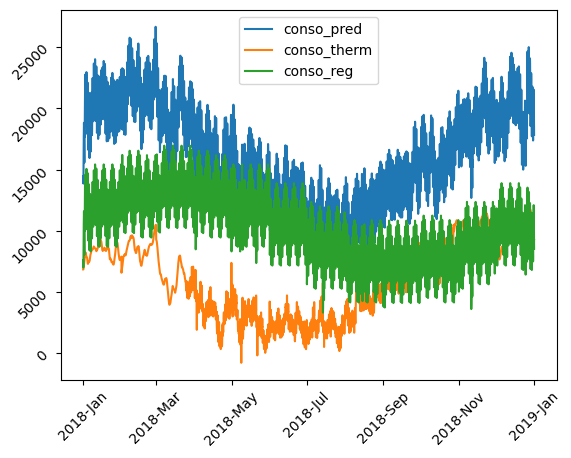

In [ ]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots()
ax.plot(res.index.values, conso_pred, label='conso_pred')
ax.plot(res.index.values, conso_therm, label='conso_therm')
ax.plot(res.index.values, conso_reg, label='conso_reg')
plt.tick_params(rotation=45)

ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
ax.legend()
plt.show()

In [ ]:
import plotly.express as px
px.line(data_frame=res)